**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Kumar Ayush\Anaconda3\lib\site-packages\IPython\core\interactives

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import seaborn as sns

### Check no.of records and features given in each dataset
hint - check shape

In [4]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [5]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


## Exploring books dataset

In [6]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Drop last three columns containing image URLs which will not be required for analysis

In [8]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

In [9]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [10]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [11]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [12]:
books = books[(books.yearOfPublication != 'DK Publishing Inc') & (books.yearOfPublication != 'Gallimard')]

### Change the datatype of yearOfPublication to 'int'

In [13]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [14]:
books.yearOfPublication = books.yearOfPublication.astype('int32')

In [15]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [16]:
#Publisher
#drop NaNs in publisher column
books = books.dropna(subset=['publisher'])
books.publisher.isnull().sum()

0

## Exploring Users dataset

In [17]:
#Users
users.shape
users.head()

(278858, 3)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [18]:
#Age
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [19]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

### Replace null values in column `Age` with mean

In [20]:
users.Age = users.Age.fillna(users.Age.mean())

### Change the datatype of `Age` to `int`

In [21]:
users.Age = users.Age.astype(np.int32)

In [22]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [23]:
ratings.shape

(1149780, 3)

In [24]:
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75669512590


In [25]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [26]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [27]:
ratings.shape

(1149780, 3)

In [28]:
ratings_new.shape

(1031130, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [29]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [30]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

In [31]:
#checking shapes
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031130, 3)
(383839, 3)
(647291, 3)


### Find out which rating has been given highest number of times

<AxesSubplot:xlabel='bookRating', ylabel='count'>

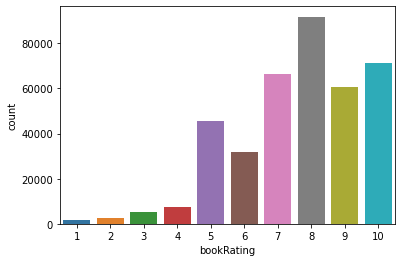

In [32]:
#plotting count of bookRating
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [33]:
counts1 = ratings_explicit['userID'].value_counts()
# print(counts1)
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]

In [34]:
ratings_explicit.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [35]:
ratings_explicit.shape

(103269, 3)

### Transform data to surprise format

In [36]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [37]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [38]:
data = Dataset.load_from_df(ratings_explicit[['userID', 'ISBN', 'bookRating']], reader)

### Points to Note:
1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library


2) UserID and ISBN in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"


3) Methods are provided to convert rw id to inner id and vice verca

### SVD Based Recommendation System

### Split the above data into trainset and testset

In [39]:
trainset, testset = train_test_split(data, test_size=0.25)

### Explore trainset and testset

In [40]:
type(trainset)

surprise.trainset.Trainset

In [41]:
# user item rating data can be obtained as follows
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [42]:
for keys in user_records.keys():
    print(keys)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [43]:
user_records[1]

[(1, 9.0),
 (1257, 10.0),
 (3428, 5.0),
 (4984, 7.0),
 (5344, 8.0),
 (5732, 9.0),
 (6414, 5.0),
 (6618, 8.0),
 (7025, 9.0),
 (937, 9.0),
 (7315, 10.0),
 (1470, 10.0),
 (8280, 8.0),
 (8772, 5.0),
 (9464, 8.0),
 (9698, 5.0),
 (10560, 5.0),
 (10982, 10.0),
 (11007, 8.0),
 (11029, 10.0),
 (2999, 9.0),
 (11853, 10.0),
 (956, 10.0),
 (12753, 5.0),
 (13401, 5.0),
 (13790, 5.0),
 (4607, 9.0),
 (15801, 10.0),
 (8198, 10.0),
 (17930, 7.0),
 (24019, 5.0),
 (24287, 8.0),
 (257, 10.0),
 (16192, 9.0),
 (1455, 10.0),
 (18398, 10.0),
 (1000, 9.0),
 (4368, 5.0),
 (26065, 5.0),
 (29018, 7.0),
 (29102, 9.0),
 (29490, 9.0),
 (30057, 9.0),
 (30103, 9.0),
 (30673, 9.0),
 (30049, 10.0),
 (31846, 10.0),
 (16545, 10.0),
 (32555, 10.0),
 (34433, 10.0),
 (7410, 5.0),
 (35324, 10.0),
 (35786, 9.0),
 (36111, 9.0),
 (4033, 10.0),
 (37649, 8.0),
 (13019, 10.0),
 (33686, 9.0),
 (38815, 5.0),
 (39411, 10.0),
 (39841, 10.0),
 (5905, 10.0),
 (40132, 10.0),
 (1974, 10.0),
 (42436, 5.0),
 (6880, 10.0),
 (32739, 8.0),
 (35

In [44]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(1))

236283
0440183057


In [45]:
user_records[0]

[(0, 10.0),
 (993, 10.0),
 (1513, 10.0),
 (1631, 10.0),
 (1798, 10.0),
 (1901, 7.0),
 (2083, 10.0),
 (2313, 10.0),
 (2609, 10.0),
 (2637, 10.0),
 (2886, 10.0),
 (3802, 10.0),
 (5369, 10.0),
 (5944, 10.0),
 (5937, 10.0),
 (6374, 10.0),
 (6691, 10.0),
 (6903, 10.0),
 (7567, 10.0),
 (7624, 10.0),
 (7801, 7.0),
 (8123, 8.0),
 (8257, 10.0),
 (8586, 8.0),
 (8767, 10.0),
 (8811, 10.0),
 (8906, 10.0),
 (4483, 10.0),
 (9113, 10.0),
 (10474, 10.0),
 (11033, 8.0),
 (7845, 10.0),
 (12526, 10.0),
 (12798, 10.0),
 (13024, 10.0),
 (13306, 10.0),
 (13379, 10.0),
 (13438, 8.0),
 (130, 10.0),
 (1608, 10.0),
 (14101, 10.0),
 (170, 10.0),
 (14588, 7.0),
 (14980, 10.0),
 (15090, 10.0),
 (5307, 10.0),
 (15969, 10.0),
 (16024, 10.0),
 (16081, 8.0),
 (16301, 9.0),
 (5085, 5.0),
 (15974, 8.0),
 (10705, 10.0),
 (18152, 10.0),
 (8573, 10.0),
 (19845, 10.0),
 (1947, 10.0),
 (20026, 10.0),
 (20364, 5.0),
 (21572, 10.0),
 (14041, 10.0),
 (13862, 10.0),
 (22533, 10.0),
 (23065, 10.0),
 (23362, 10.0),
 (13186, 10.0),

### Import SVD from Surprise and for on trainset

In [46]:
from surprise import SVD
from surprise import accuracy

In [47]:
algo = SVD()

In [48]:
algo.fit(trainset)

### Predict ratings for testset and check RMSE

In [49]:
testset = trainset.build_anti_testset()

In [50]:
predictions = algo.test(testset)

In [51]:
predictions

[Prediction(uid=236283, iid='0440183057', r_ui=7.830667131476676, est=8.88500264179348, details={'was_impossible': False}),
 Prediction(uid=236283, iid='0060935464', r_ui=7.830667131476676, est=9.275242835208019, details={'was_impossible': False}),
 Prediction(uid=236283, iid='0440217512', r_ui=7.830667131476676, est=9.24542209606853, details={'was_impossible': False}),
 Prediction(uid=236283, iid='0395437482', r_ui=7.830667131476676, est=9.39546222780059, details={'was_impossible': False}),
 Prediction(uid=236283, iid='0451168690', r_ui=7.830667131476676, est=9.229377775881865, details={'was_impossible': False}),
 Prediction(uid=236283, iid='0061030643', r_ui=7.830667131476676, est=9.47449914425947, details={'was_impossible': False}),
 Prediction(uid=236283, iid='0829809570', r_ui=7.830667131476676, est=9.096098317150378, details={'was_impossible': False}),
 Prediction(uid=236283, iid='0812562836', r_ui=7.830667131476676, est=9.322738069196486, details={'was_impossible': False}),
 Pre

In [52]:
# compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9844


0.9844272812356143

In [53]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(predictions, verbose=True)

Item-based Model : Test Set
RMSE: 0.9844


0.9844272812356143

In [54]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5045  1.5112  1.4999  1.4956  1.5068  1.5036  0.0054  
MAE (testset)     1.1215  1.1271  1.1192  1.1210  1.1240  1.1225  0.0028  
Fit time          6.50    5.66    5.74    5.94    5.55    5.88    0.34    
Test time         1.95    0.15    0.22    0.16    0.14    0.52    0.71    


{'test_rmse': array([1.50454562, 1.51120313, 1.49988661, 1.49561484, 1.50684561]),
 'test_mae': array([1.12147549, 1.12711628, 1.11916739, 1.12096874, 1.12400042]),
 'fit_time': (6.498461008071899,
  5.664945602416992,
  5.741487741470337,
  5.935900449752808,
  5.5468974113464355),
 'test_time': (1.9505350589752197,
  0.14560723304748535,
  0.21610641479492188,
  0.16272783279418945,
  0.14292383193969727)}

### Generating top n recommendations for a user

In [55]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [56]:
top_n = get_top_n(predictions, n=10)

In [57]:
top_n

defaultdict(list,
            {236283: [('0380811081', 10),
              ('0156012197', 10),
              ('0812550706', 10),
              ('0451166892', 10),
              ('0451190572', 10),
              ('0471799297', 10),
              ('0156027321', 10),
              ('0553580337', 10),
              ('0064400557', 10),
              ('0439064872', 10)],
             29259: [('059035342X', 10),
              ('0385504209', 10),
              ('0345361792', 10),
              ('156402976X', 10),
              ('0618002235', 9.945985631006266),
              ('0449005615', 9.927445782091256),
              ('3442092981', 9.808608895157215),
              ('0064400557', 9.725104004106175),
              ('0394800389', 9.723169671666861),
              ('0811801802', 9.719122443298218)],
             169682: [('0385504209', 8.25130053989881),
              ('006092988X', 7.920254890208158),
              ('0812550706', 7.913542797621811),
              ('0811801802', 7.8640934251

In [58]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

236283 ['0380811081', '0156012197', '0812550706', '0451166892', '0451190572', '0471799297', '0156027321', '0553580337', '0064400557', '0439064872']
29259 ['059035342X', '0385504209', '0345361792', '156402976X', '0618002235', '0449005615', '3442092981', '0064400557', '0394800389', '0811801802']
169682 ['0385504209', '006092988X', '0812550706', '0811801802', '0064400557', '0439136369', '0375504397', '0393050939', '0743227441', '0618002235']
147847 ['0064400557', '0743454529', '0312195516', '0064401111', '1592400876', '0671870114', '0671794019', '0316881791', '0836217691', '0307131726']
125519 ['0446365386', '059035342X', '0385484518', '0446310786', '0743454529', '0140143505', '0380018179', '0312144075', '006092988X', '0439136369']
162738 ['0684857820', '0385484518', '096463161X', '0451526341', '0836218833', '0836204387', '0838934838', '0060952520', '0451410912', '0671027077']
136010 ['0140143505', '0440498058', '006092988X', '0679723161', '0812550706', '0380813815', '0440967694', '038530